In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<strong>Problem Statement -: To Predict whether a customer will churn or not</strong>

In [2]:
data = pd.read_csv('Telecom_customer_churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

<strong>First-thing we need to convert charges to float64 from object</strong>

In [23]:
totalChar = []
for i,j in enumerate(data.TotalCharges):
    try:
        totalChar.append(float(j))
    except:
        print(i, j)

488  
753  
936  
1082  
1340  
3331  
3826  
4380  
5218  
6670  
6754  


<strong>Above interpretation implies that there are empty values in place of totalCharges in some columns</strong>

In [24]:
totalChar = []
for i,j in enumerate(data.TotalCharges):
    try:
        totalChar.append(float(j))
    except:
        totalChar.append(np.nan)

In [25]:
data['TotalCharges'] = totalChar

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [27]:
data = data.drop(columns=['customerID'])

In [28]:
data.shape

(7043, 20)

<h2>Exploratory Data Analysis</h2>

In [29]:
cat_cols = [col for col in data.columns if data[col].dtype=='object']
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [31]:
num_cols = [col for col in data.columns if col not in cat_cols]

In [33]:
num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [34]:
num_cols.remove('SeniorCitizen')
cat_cols.append('SeniorCitizen')

<h3>StripPlots</h3>

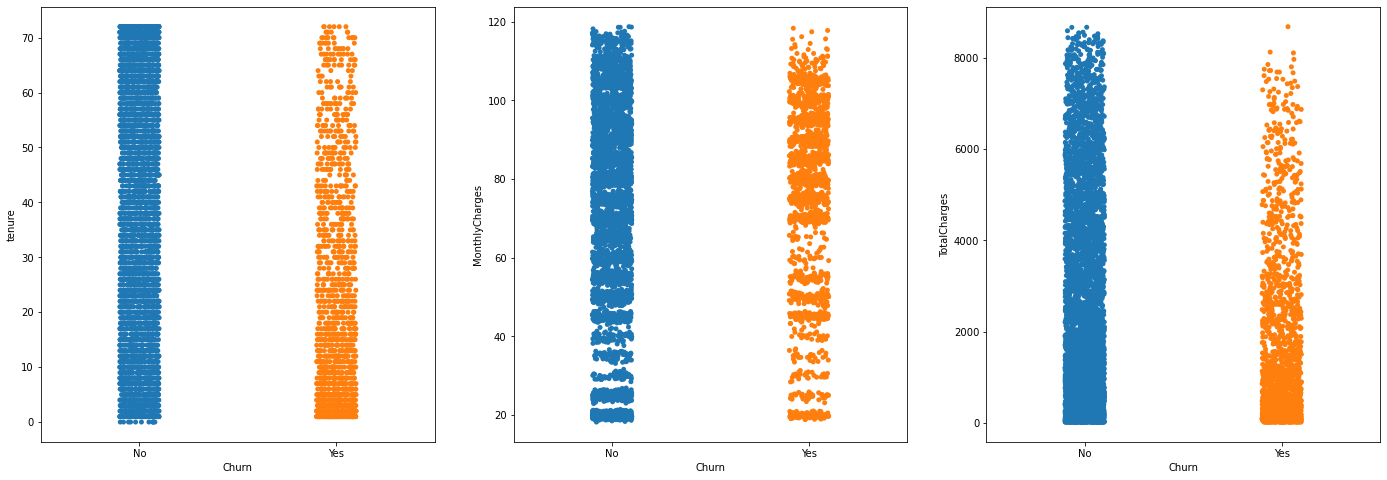

In [36]:
plt.figure(figsize=(24,8))
plotnumber=1
for col in num_cols:
    plt.subplot(1,3, plotnumber)
    sns.stripplot(x='Churn', y=col, data=data)
    plotnumber+=1

<strong>if tenure goes high , chances of churning are less<br> If monthly charges are less chances of churning are low<br> If TotalCharges are high chances of churning are low</strong>

<h3>KDEPlots</h3>

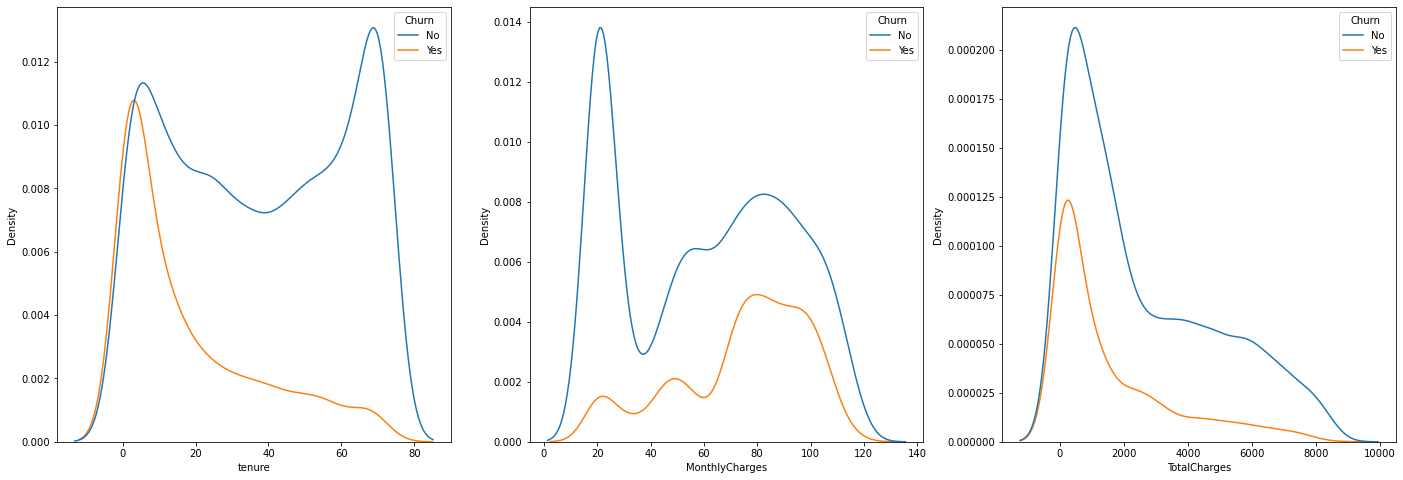

In [37]:
plt.figure(figsize=(24,8))
plotnumber=1
for col in num_cols:
    plt.subplot(1,3, plotnumber)
    sns.kdeplot(hue='Churn', x=col, data=data)
    plotnumber+=1

<strong>As we predicted earlier , as tenure goes high chances of churning are low<br> If monthly charges are low, chances of churning are low<br> If total Charges are high chances of churning are less</strong>

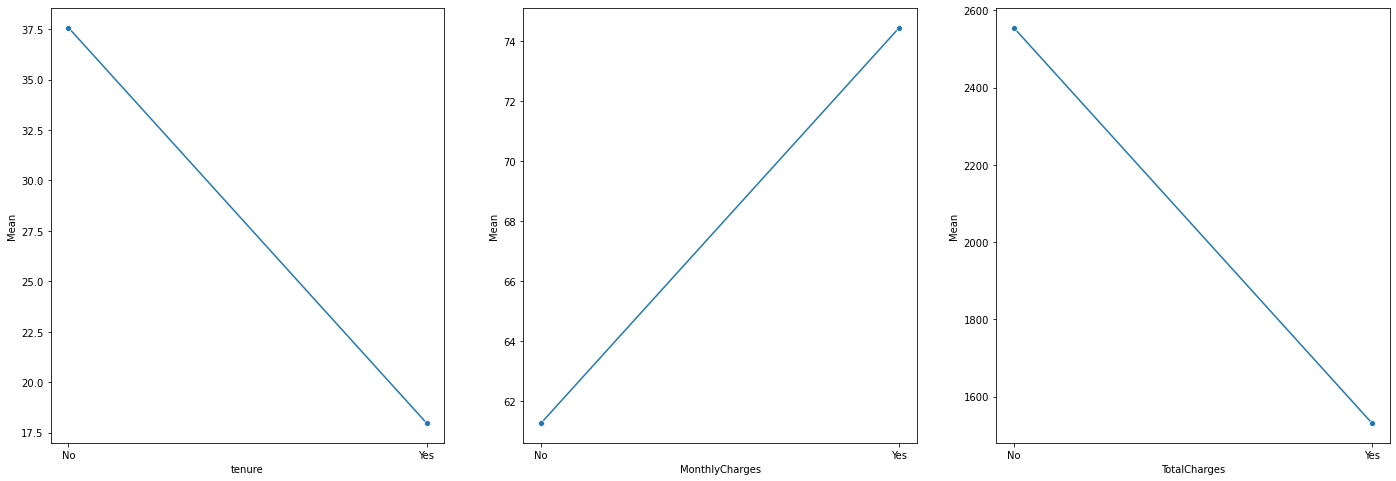

In [38]:
plt.figure(figsize=(24,8))
plotnumber = 1
for col in num_cols:
    mean_vals = pd.DataFrame()
    unique_val = data['Churn'].unique().tolist()
    means = []
    for val in unique_val:
        mean_val = data[data['Churn'] == val]
        mean_val = mean_val[col].mean()
        means.append(mean_val)
    mean_vals['Values'] = unique_val
    mean_vals['Mean'] = means
    plt.subplot(1,3, plotnumber)
    sns.lineplot(x='Values', y='Mean', data=mean_vals, marker='o')
    plt.xlabel(col)
    plotnumber+=1

<strong>Mean values also interpret the same thing, as we observed in stripplots and KDEplots</strong>

In [39]:
churn_y = data[data['Churn']=='Yes']
churn_n = data[data['Churn']=='No']

In [40]:
churn_y.shape

(1869, 20)

In [41]:
churn_n.shape

(5174, 20)

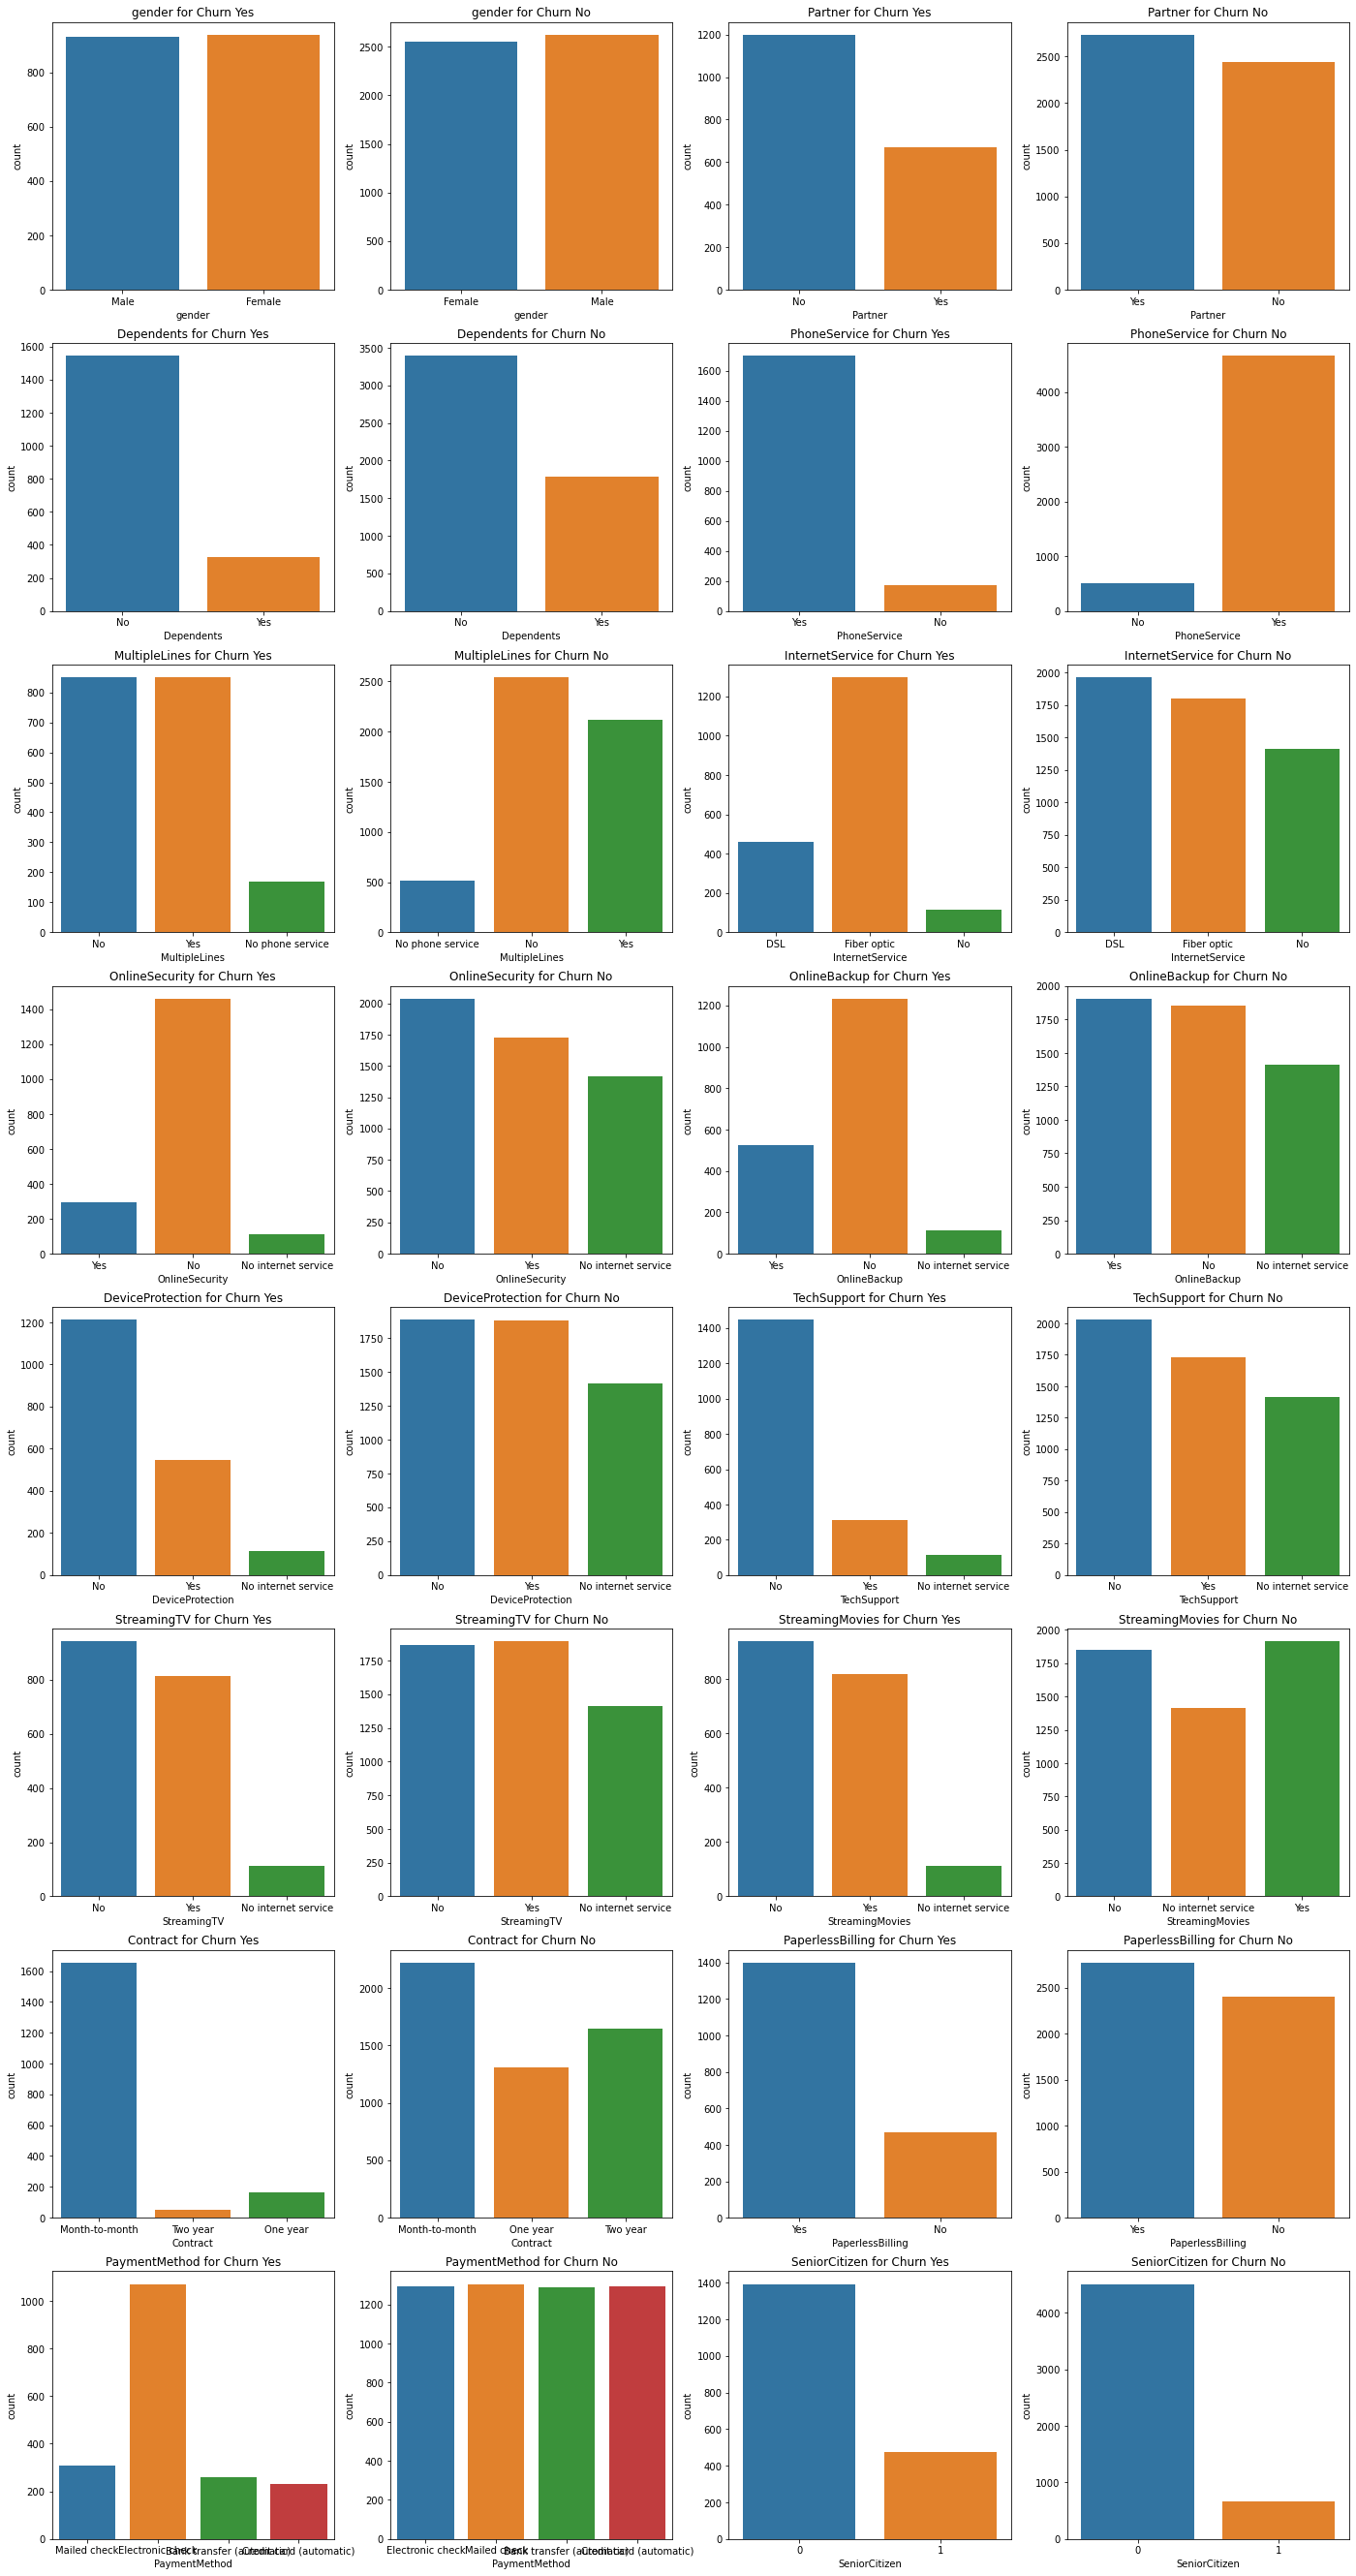

In [43]:
plt.figure(figsize=(24,60))
plotnumber=1
for col in cat_cols:
    if col!='Churn':
        plt.subplot(10,4,plotnumber)
        sns.countplot(col, data=churn_y)
        plotnumber+=1
        plt.title(f'{col} for Churn Yes')
        plt.subplot(10,4,plotnumber)
        sns.countplot(col, data=churn_n)
        plotnumber+=1
        plt.title(f'{col} for Churn No')

<strong>
    <ul>
        <li>If partner is yes, chances of churning are low</li>
        <li>If there are multiple lines, chances of churning are low</li> 
        <li>If InternetService is DSL , chances of churing are low</li>
        <li>If InternetService is No , chances of churing are low</li>
        <li>If OnlineSecurity is Yes , chances of churing are low</li>
        <li>If OnlineSecurity is NoInternetService, chances of churing are low</li>
        <li>If OnlineBackup is Yes , chances of churing are low</li>
        <li>If OnlineBackup is NoInternetService, chances of churing are low</li>
        <li>If DeviceProtection is Yes , chances of churing are low</li>
        <li>If DeviceProtection is NoInternetService, chances of churing are low</li>
        <li>If TechSupport is Yes , chances of churing are low</li>
        <li>If TechSupport is NoInternetService, chances of churing are low</li>
        <li>If paymentMethod is Electronic, chances of churning are high</li>
    </ul>
</strong>

<h2>Correlation Matrix</h2>

In [44]:
data.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.102411
tenure,0.016567,1.000000,0.247900,0.825880
MonthlyCharges,0.220173,0.247900,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.651065,1.000000


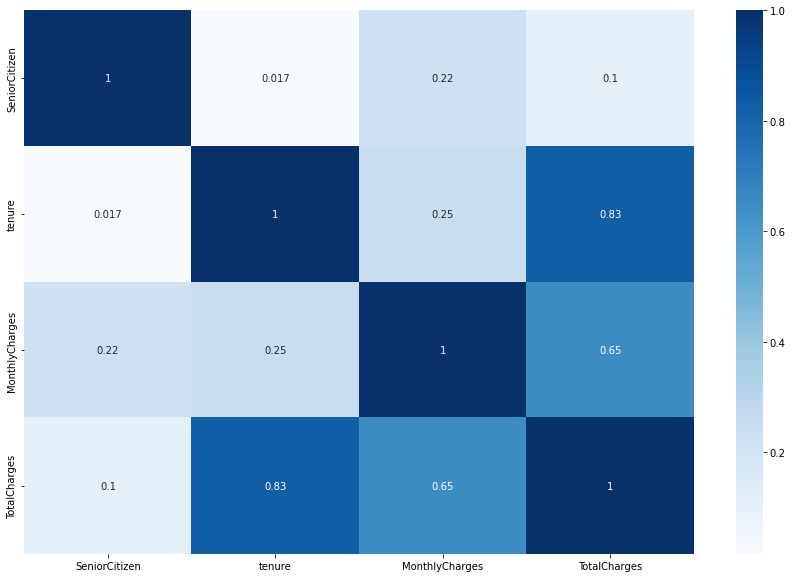

In [46]:
plt.figure(figsize=(15,10))

sns.heatmap(data.corr(), cmap='Blues', annot=True)

<strong>Tenure has 83% correlation with TotalCharges<br>MonthlyCharges has 65% correlation with TotalCharges</strong>

<h2>Descriptive Statistis</h2>

In [48]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


<h2>PairPlot</h2>

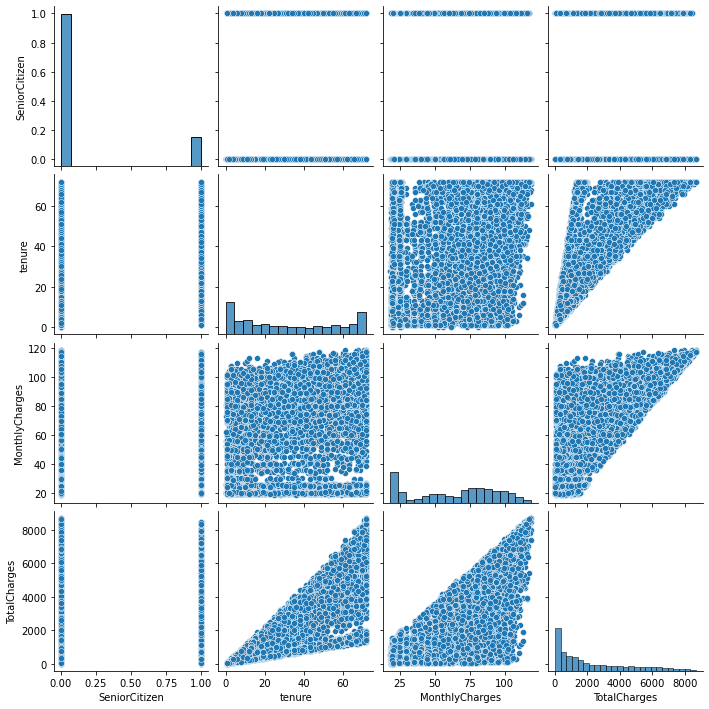

In [49]:
sns.pairplot(data)

In [53]:
data = data.dropna()

<h2>Handling Outliers</h2>

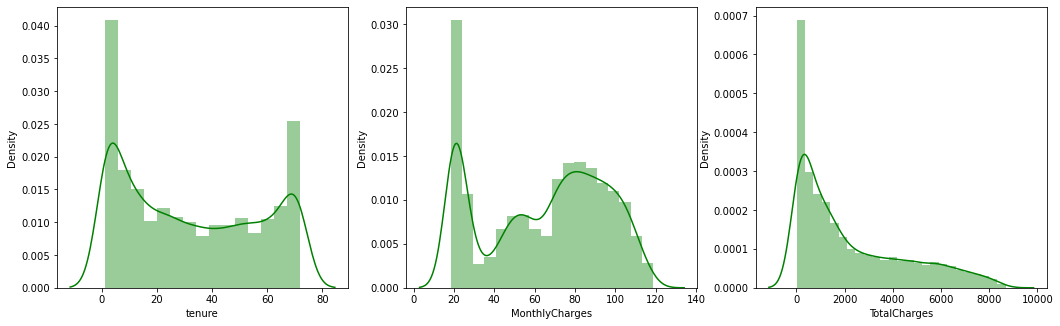

In [54]:
X = data[num_cols]

plt.figure(figsize=(24,30))
plotnumber  = 1
for col in num_cols:
    plt.subplot(5,4,plotnumber)
    sns.distplot(data[col], color='green')
    plotnumber+=1

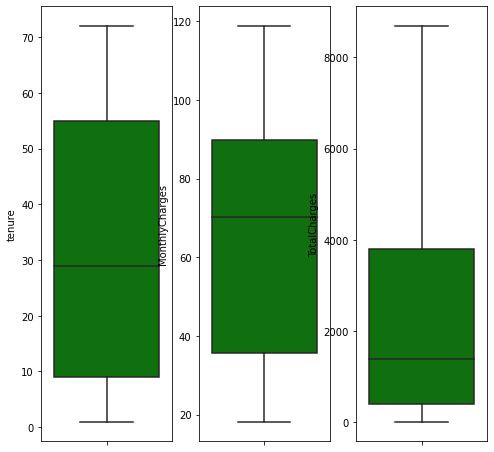

In [57]:
plt.figure(figsize=(8,8))
plotnumber  = 1
for col in num_cols:
    plt.subplot(1,3,plotnumber)
    sns.boxplot(y=data[col], color='green')
    plotnumber+=1

In [58]:
data[num_cols].skew()

tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

In [59]:


from scipy.stats import zscore
z = np.abs(zscore(X))
print(z.shape)
print(len(np.where(z>3)[0]))

data_new = data[(z<3).all(axis=1)]
print("Old Shape", data.shape)
print("New Shape", data_new.shape)
print("Total Dropped Rows", data.shape[0] - data_new.shape[0])

(7032, 3)
0
Old Shape (7032, 20)
New Shape (7032, 20)
Total Dropped Rows 0


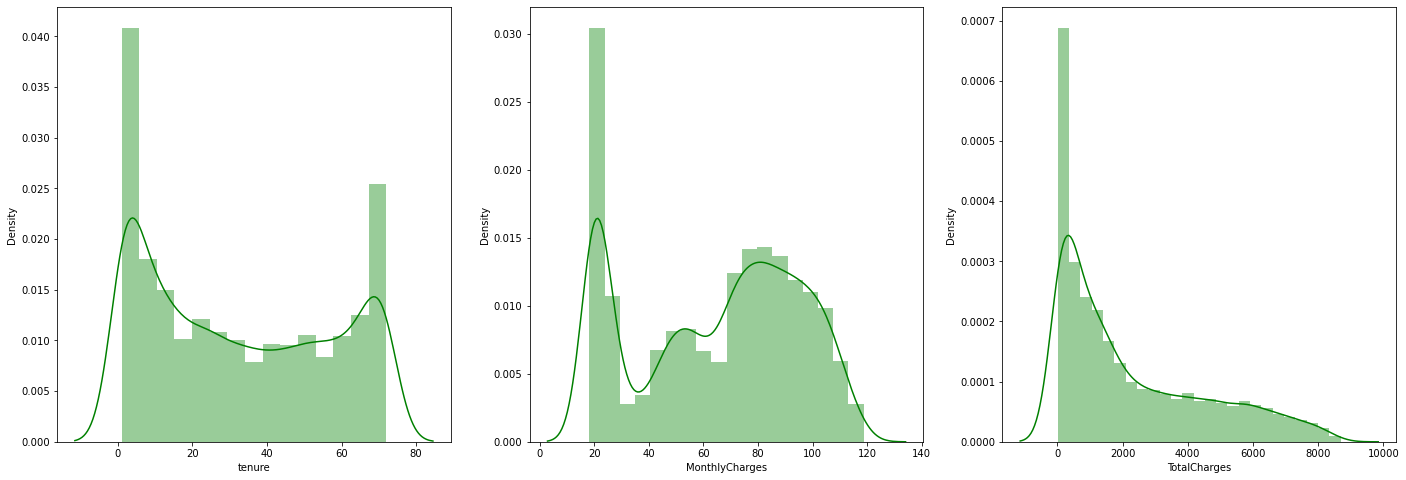

In [60]:
plt.figure(figsize=(24,8))
plotnumber  = 1
for col in num_cols:
    plt.subplot(1,3,plotnumber)
    sns.distplot(data_new[col], color='green')
    plotnumber+=1

In [61]:
data_new[num_cols].skew()

tenure            0.237731
MonthlyCharges   -0.222103
TotalCharges      0.961642
dtype: float64

In [62]:
X = data_new.drop(columns=['Churn'])
y = data_new.Churn

In [63]:
X.shape

(7032, 19)

In [64]:
y.shape

(7032,)

In [65]:
X = pd.get_dummies(X)

In [66]:
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,1,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,1,1,0,1,0,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,0,1,1,0,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,1,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,0,1,0,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,1,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,0,1,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


<h2>Preprocessing</h2>

In [67]:
from sklearn.preprocessing import power_transform
X_copy = power_transform(X, method='yeo-johnson')

In [68]:
X_copy = pd.DataFrame(X_copy, columns=X.columns)

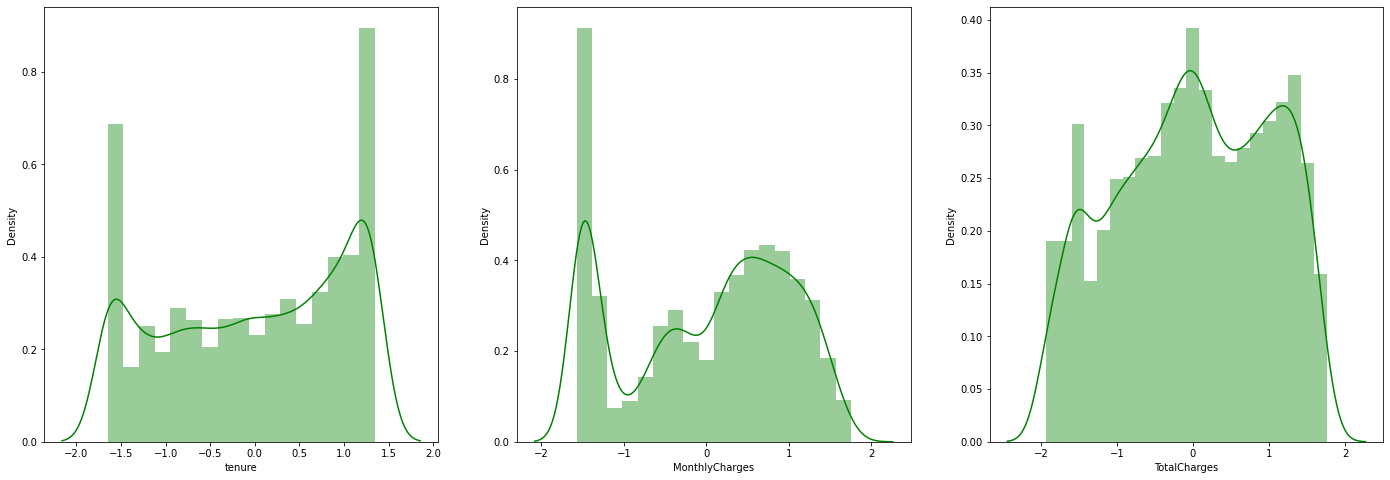

In [69]:
plt.figure(figsize=(24,8))
plotnumber  = 1
for col in num_cols:
    plt.subplot(1,3,plotnumber)
    sns.distplot(X_copy[col], color='green')
    plotnumber+=1

In [70]:
X_copy[num_cols].skew()

tenure           -0.242816
MonthlyCharges   -0.259485
TotalCharges     -0.144643
dtype: float64

<h2>Scaling</h2>

In [71]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_scaled = sc.fit_transform(X_copy)

X = pd.DataFrame(X_scaled, columns=X.columns)

In [72]:
X[num_cols].mean()

tenure           -9.258174e-17
MonthlyCharges   -6.031075e-18
TotalCharges      2.052460e-17
dtype: float64

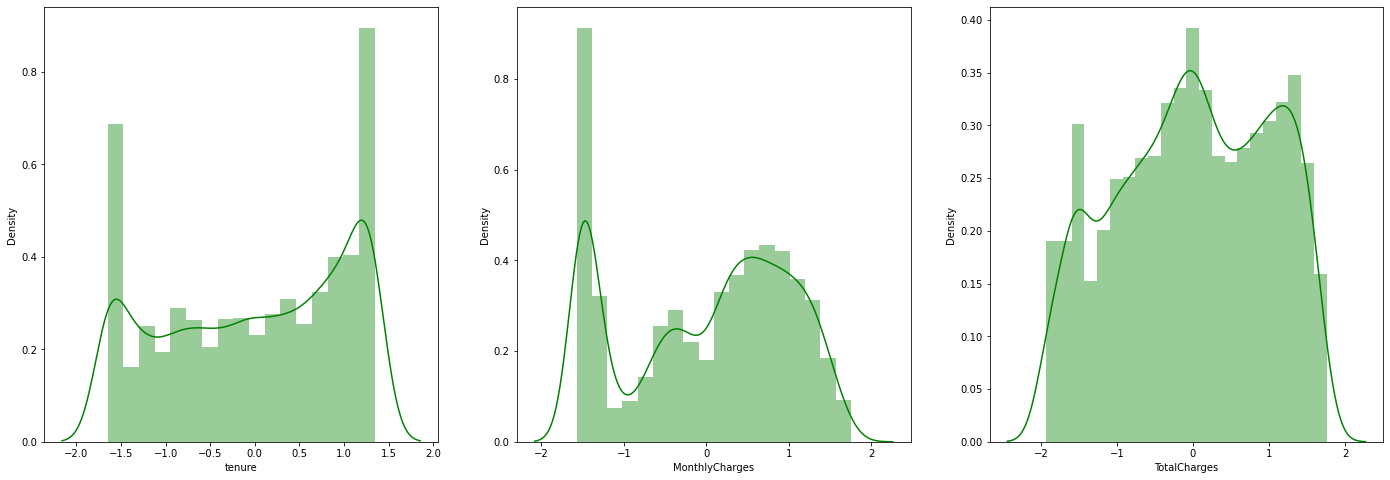

In [73]:
plt.figure(figsize=(24,8))
plotnumber  = 1
for col in num_cols:
    plt.subplot(1,3,plotnumber)
    sns.distplot(X[col], color='green')
    plotnumber+=1

<h2>MultiCollinearity Using VIF</h2>

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X[num_cols].values, i) for i in range(X[num_cols].shape[1])]
vif["Features"] = X[num_cols].columns
vif.nlargest(5, 'vif')

,vif,Features
2,49.201326,TotalCharges
0,32.428814,tenure
1,9.834142,MonthlyCharges


In [75]:
num_cols.remove('TotalCharges')
X = X.drop(columns=['TotalCharges'])

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X[num_cols].values, i) for i in range(X[num_cols].shape[1])]
vif["Features"] = X[num_cols].columns
vif.nlargest(5, 'vif')

,vif,Features
1,1.062801,MonthlyCharges
0,1.062801,tenure


<strong>No MultiCollinearity Probelm Now</strong>

<h2>OverSampling`</h2>

In [76]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

<h2>Building and Training Models</h2>

In [77]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, plot_roc_curve, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(7228, 44)
(3098, 44)


<h3>LogisticRegression</h3>

In [78]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.780852241283896
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.75      0.80      0.77      3394
         Yes       0.81      0.77      0.79      3834

    accuracy                           0.78      7228
   macro avg       0.78      0.78      0.78      7228
weighted avg       0.78      0.78      0.78      7228


Testing Accuracy : 0.7740477727566172
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.75      0.79      0.77      1473
         Yes       0.80      0.76      0.78      1625

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.78      0.77      0.77      3098



Text(33.0, 0.5, 'Predicted')

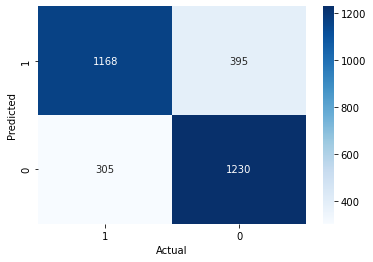

In [79]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

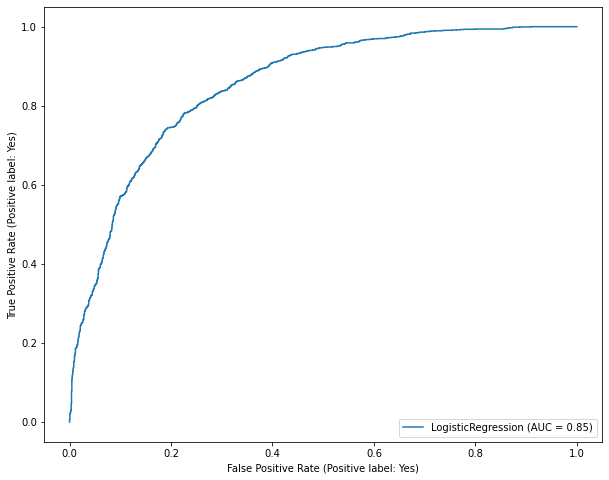

In [80]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)

HyperParameter Tuning

In [81]:
lrcv  = LogisticRegression()
grid_param = {
    'penalty':['l2'],
    'dual':[True, False],
    'max_iter':np.arange(2,20,4),
    'fit_intercept':[True, False],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
}

grid_lr = GridSearchCV(lrcv, param_grid = grid_param, cv=3, n_jobs=-1, verbose=True)
grid_lr.fit(X_train, y_train)
print('Best Score:', grid_lr.best_score_)
print('Best Params:', grid_lr.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Score: 0.7802967433672828
Best Params: {'dual': False, 'fit_intercept': True, 'max_iter': 2, 'penalty': 'l2', 'solver': 'liblinear'}


In [82]:
lrcv = LogisticRegression(solver='liblinear', max_iter=2)
lrcv.fit(X_train, y_train)

y_pred_train = lrcv.predict(X_train)
y_pred_test = lrcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.7815439955727725
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.75      0.80      0.77      3361
         Yes       0.82      0.76      0.79      3867

    accuracy                           0.78      7228
   macro avg       0.78      0.78      0.78      7228
weighted avg       0.78      0.78      0.78      7228


Testing Accuracy : 0.7734021949644933
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.74      0.80      0.77      1455
         Yes       0.81      0.75      0.78      1643

    accuracy                           0.77      3098
   macro avg       0.77      0.77      0.77      3098
weighted avg       0.78      0.77      0.77      3098



Text(33.0, 0.5, 'Predicted')

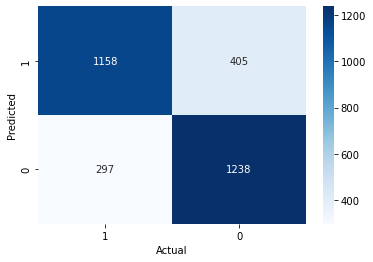

In [83]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

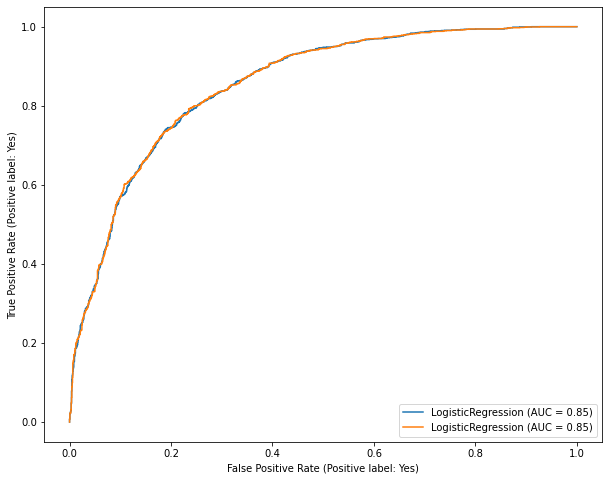

In [85]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)

<h3>KNeighbborsClassifier</h3>

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.8490592141671278
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.76      0.92      0.83      2963
         Yes       0.94      0.80      0.86      4265

    accuracy                           0.85      7228
   macro avg       0.85      0.86      0.85      7228
weighted avg       0.86      0.85      0.85      7228


Testing Accuracy : 0.7840542285345384
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.68      0.86      0.76      1230
         Yes       0.89      0.73      0.80      1868

    accuracy                           0.78      3098
   macro avg       0.79      0.80      0.78      3098
weighted avg       0.81      0.78      0.79      3098



Text(33.0, 0.5, 'Predicted')

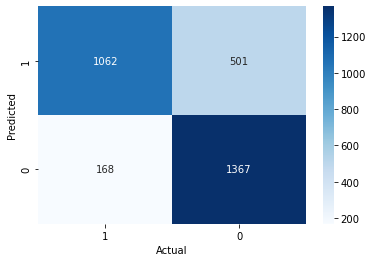

In [88]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

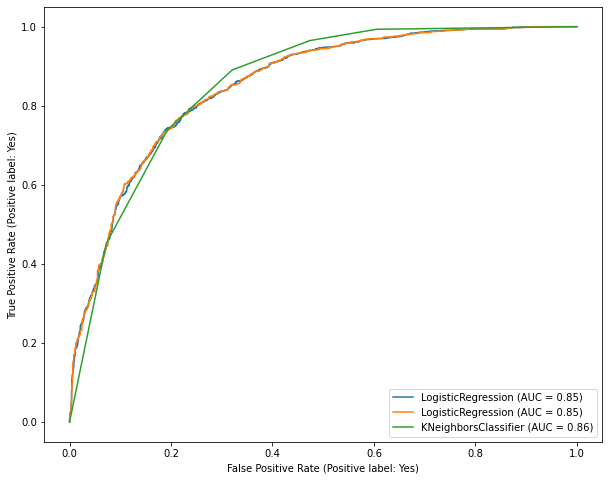

In [89]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(knn, X_test, y_test, ax=ax)

HyperParameter Tuning

In [90]:
knncv = KNeighborsClassifier()

grid_param = {
    'n_neighbors':[3,5,7,9,11,13],
    'leaf_size':[5,10,15,25,30,35,40,50]
}

grid_knn = GridSearchCV(knncv, param_grid=grid_param, n_jobs=-1, cv=3, verbose=3)
grid_knn.fit(X_train, y_train)
print('Best Score:', grid_knn.best_score_)
print('Best Params:', grid_knn.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Score: 0.7797442394156997
Best Params: {'leaf_size': 5, 'n_neighbors': 3}


In [91]:
knncv = KNeighborsClassifier(n_neighbors=3, leaf_size=5)
knncv.fit(X_train, y_train)

y_pred_train = knncv.predict(X_train)
y_pred_test = knncv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.8894576646375207
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.82      0.95      0.88      3091
         Yes       0.96      0.84      0.90      4137

    accuracy                           0.89      7228
   macro avg       0.89      0.90      0.89      7228
weighted avg       0.90      0.89      0.89      7228


Testing Accuracy : 0.7921239509360878
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.68      0.88      0.77      1201
         Yes       0.91      0.73      0.81      1897

    accuracy                           0.79      3098
   macro avg       0.79      0.81      0.79      3098
weighted avg       0.82      0.79      0.79      3098



Text(33.0, 0.5, 'Predicted')

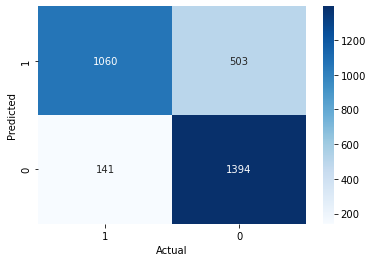

In [92]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

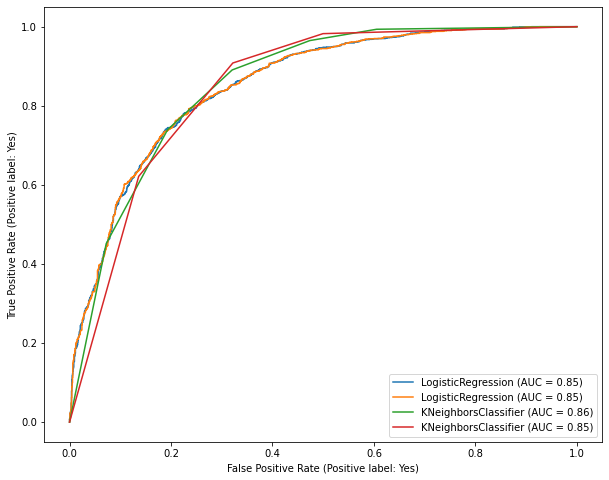

In [93]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(knn, X_test, y_test, ax=ax)
plot_roc_curve(knncv, X_test, y_test, ax=ax)

<strong>KNN is performing better than LogisticRegression as it has high AUC</strong>

<h3>Decision Tree Classifier</h3>

In [94]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.9986164914222468
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      3608
         Yes       1.00      1.00      1.00      3620

    accuracy                           1.00      7228
   macro avg       1.00      1.00      1.00      7228
weighted avg       1.00      1.00      1.00      7228


Testing Accuracy : 0.7811491284699806
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.78      0.78      0.78      1559
         Yes       0.78      0.78      0.78      1539

    accuracy                           0.78      3098
   macro avg       0.78      0.78      0.78      3098
weighted avg       0.78      0.78      0.78      3098



Text(33.0, 0.5, 'Predicted')

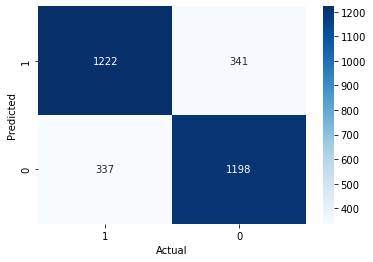

In [95]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

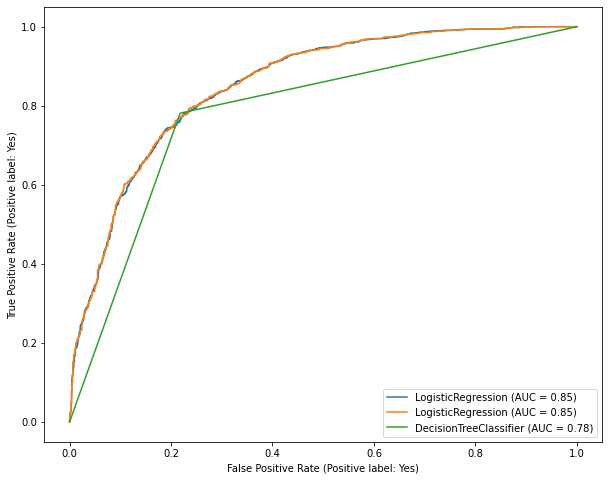

In [96]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)

HyperParameter Tuning

In [99]:
dtcv = DecisionTreeClassifier()
grid_param = {
    'criterion':['gini', 'entropy'],
    'splitter':['best', 'random'],
    'max_depth':[None,18,19,20,21,22,23,24,25,26,27,28,29,30],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[3,4,5,6,7],
    'max_leaf_nodes':[16,17,18,19,20,25,30,35,40,50,None]
}

grid_dt = GridSearchCV(dtcv, param_grid=grid_param, cv=3, n_jobs=-1, verbose=1)
grid_dt.fit(X_train, y_train)

print('Best Score:', grid_dt.best_score_)
print('Best Params:', grid_dt.best_params_)

Fitting 3 folds for each of 9240 candidates, totalling 27720 fits
Best Score: 0.7978674369454793
Best Params: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': 35, 'min_samples_leaf': 3, 'min_samples_split': 4, 'splitter': 'best'}


In [100]:
dtcv = DecisionTreeClassifier(criterion='gini', max_depth=None, max_leaf_nodes=35, min_samples_leaf=3, min_samples_split=4, splitter='best')

dtcv.fit(X_train, y_train)

y_pred_train = dtcv.predict(X_train)
y_pred_test = dtcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.8074156059767571
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.80      0.81      0.81      3552
         Yes       0.81      0.80      0.81      3676

    accuracy                           0.81      7228
   macro avg       0.81      0.81      0.81      7228
weighted avg       0.81      0.81      0.81      7228


Testing Accuracy : 0.7792123950936087
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.77      0.79      0.78      1533
         Yes       0.79      0.77      0.78      1565

    accuracy                           0.78      3098
   macro avg       0.78      0.78      0.78      3098
weighted avg       0.78      0.78      0.78      3098



Text(33.0, 0.5, 'Predicted')

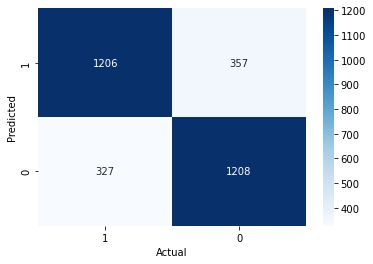

In [101]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')


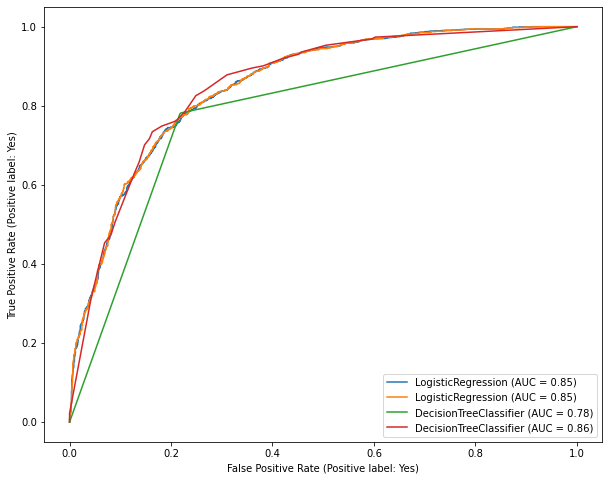

In [102]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)

<strong>DecisionTree is performing better than other models</strong>

<h3>RandomForestClassifier</h3>

In [103]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf.fit(X_train, y_train)

y_pred_train = rf.predict(X_train)
y_pred_test = rf.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.9986164914222468
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       1.00      1.00      1.00      3596
         Yes       1.00      1.00      1.00      3632

    accuracy                           1.00      7228
   macro avg       1.00      1.00      1.00      7228
weighted avg       1.00      1.00      1.00      7228


Testing Accuracy : 0.8515171078114913
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.84      0.86      0.85      1537
         Yes       0.86      0.84      0.85      1561

    accuracy                           0.85      3098
   macro avg       0.85      0.85      0.85      3098
weighted avg       0.85      0.85      0.85      3098



Text(33.0, 0.5, 'Predicted')

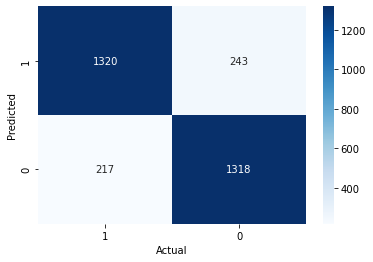

In [104]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

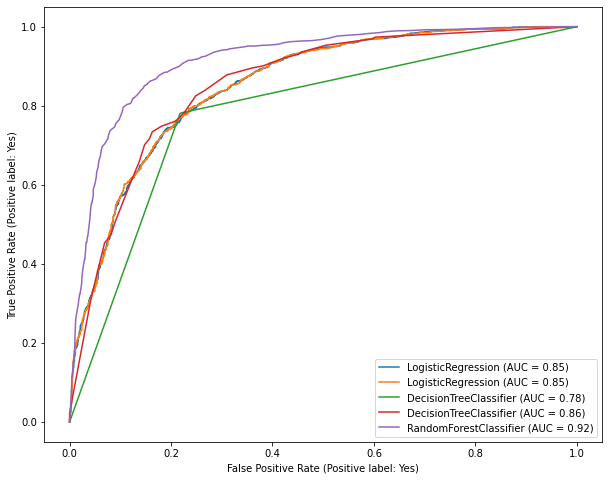

In [105]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)


<strong>RandomForest is performing better than other models</strong>

HyperParameter Tuning

In [108]:
rfcv = RandomForestClassifier()

grid_param = {
    'n_estimators':[300,350,400,450],
    'max_depth':[None,14,15,16,17,18,19,20],
    'min_samples_split':[2,3,4,],
    'min_samples_leaf':[2,3,4,],
    'max_leaf_nodes':[None,25,30,35,40],
    'n_jobs':[-1]
}

grid_rf = GridSearchCV(rfcv, param_grid = grid_param, cv=3, n_jobs=-1,verbose=3)
grid_rf.fit(X_train, y_train)

print('Best Score:', grid_rf.best_score_)
print('Best Params:', grid_rf.best_params_)

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits
Best Score: 0.8395111806980163
Best Params: {'max_depth': 18, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 400, 'n_jobs': -1}


In [109]:
rfcv = RandomForestClassifier( max_depth=18, min_samples_leaf=2, min_samples_split=3, n_estimators=400, max_leaf_nodes=None)

rfcv.fit(X_train, y_train)

y_pred_train = rfcv.predict(X_train)
y_pred_test = rfcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.9417542888765911
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.92      0.96      0.94      3429
         Yes       0.97      0.92      0.94      3799

    accuracy                           0.94      7228
   macro avg       0.94      0.94      0.94      7228
weighted avg       0.94      0.94      0.94      7228


Testing Accuracy : 0.8495803744351195
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.82      0.87      0.85      1479
         Yes       0.88      0.83      0.85      1619

    accuracy                           0.85      3098
   macro avg       0.85      0.85      0.85      3098
weighted avg       0.85      0.85      0.85      3098



Text(33.0, 0.5, 'Predicted')

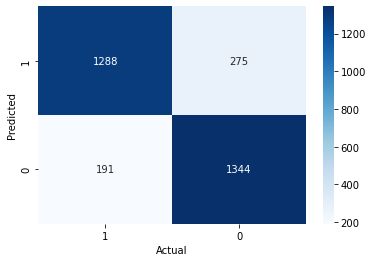

In [110]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

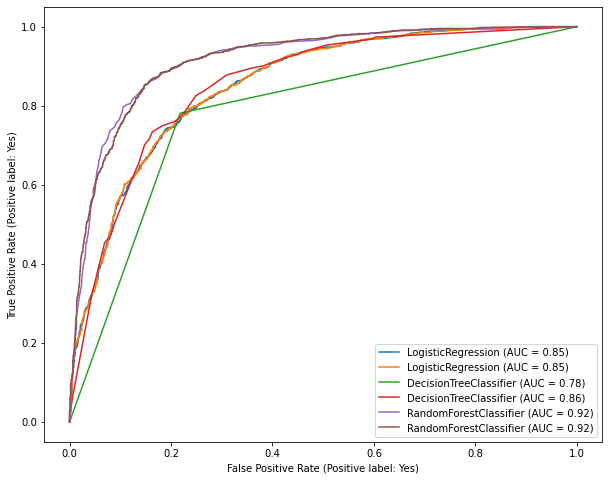

In [111]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)
plot_roc_curve(rfcv, X_test, y_test, ax=ax)

<strong>RandomForest is performing better than all other models , as it has the highest area under the curve</strong>

<h3>AdaBoostClassifier</h3>

In [112]:
from sklearn.ensemble import AdaBoostClassifier

ad = AdaBoostClassifier()

ad.fit(X_train, y_train)

y_pred_train = ad.predict(X_train)
y_pred_test = ad.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.8146098505810736
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.77      0.85      0.80      3270
         Yes       0.86      0.79      0.82      3958

    accuracy                           0.81      7228
   macro avg       0.81      0.82      0.81      7228
weighted avg       0.82      0.81      0.82      7228


Testing Accuracy : 0.8092317624273725
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.76      0.84      0.80      1410
         Yes       0.86      0.78      0.82      1688

    accuracy                           0.81      3098
   macro avg       0.81      0.81      0.81      3098
weighted avg       0.81      0.81      0.81      3098



Text(33.0, 0.5, 'Predicted')

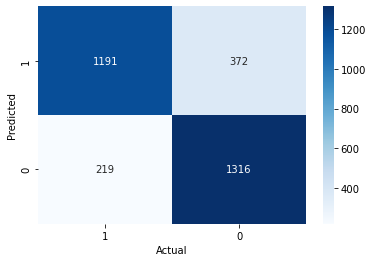

In [113]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

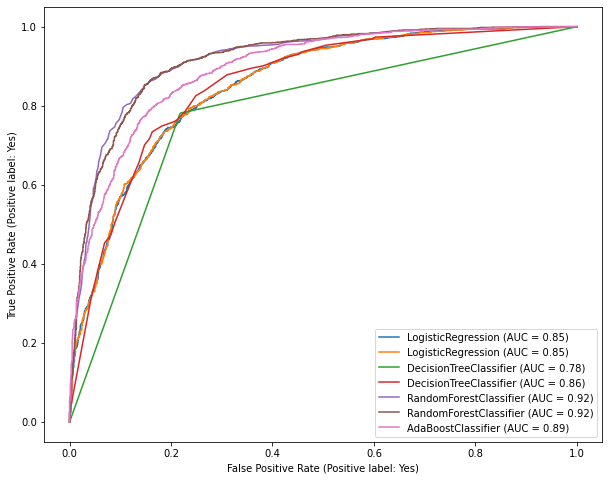

In [114]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)
plot_roc_curve(rfcv, X_test, y_test, ax=ax)
plot_roc_curve(ad, X_test, y_test, ax=ax)

HyperParameter Tuning

In [116]:
adcv = AdaBoostClassifier()

grid_params ={
    'n_estimators':[150,200,250,300,250],
    'learning_rate':[1,1.4,1.5,1.6,1.7,1.8,1.9,2,2.1]
}

grid_ad = GridSearchCV(adcv, param_grid=grid_params, cv=3, verbose=1)

grid_ad.fit(X_train, y_train)

print('Best Score:', grid_ad.best_score_)
print('Best Params:', grid_ad.best_params_)

Fitting 3 folds for each of 45 candidates, totalling 135 fits
Best Score: 0.8480890873149157
Best Params: {'learning_rate': 1.5, 'n_estimators': 200}


In [117]:
adcv = AdaBoostClassifier(n_estimators=200, learning_rate=1.5)
adcv.fit(X_train, y_train)

y_pred_train = adcv.predict(X_train)
y_pred_test = adcv.predict(X_test)

print("Training Accuracy : ", accuracy_score(y_pred_train, y_train))
print("Training Classification Report ======>>>> \n", classification_report(y_pred_train, y_train))
print("\nTesting Accuracy :", accuracy_score(y_pred_test, y_test))
print("Testing Classification Report ======>>>> \n", classification_report(y_pred_test, y_test))

Training Accuracy :  0.8521029330381849
Training Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.83      0.86      0.85      3479
         Yes       0.87      0.84      0.86      3749

    accuracy                           0.85      7228
   macro avg       0.85      0.85      0.85      7228
weighted avg       0.85      0.85      0.85      7228


Testing Accuracy : 0.8502259522272434
Testing Classification Report ======>>>> 
               precision    recall  f1-score   support

          No       0.83      0.87      0.85      1501
         Yes       0.87      0.84      0.85      1597

    accuracy                           0.85      3098
   macro avg       0.85      0.85      0.85      3098
weighted avg       0.85      0.85      0.85      3098



Text(33.0, 0.5, 'Predicted')

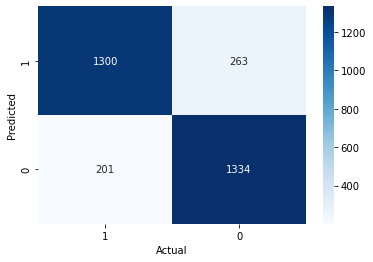

In [118]:
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, xticklabels=[1,0], yticklabels=(1,0), cmap='Blues', fmt='g')
plt.xlabel('Actual')
plt.ylabel('Predicted')

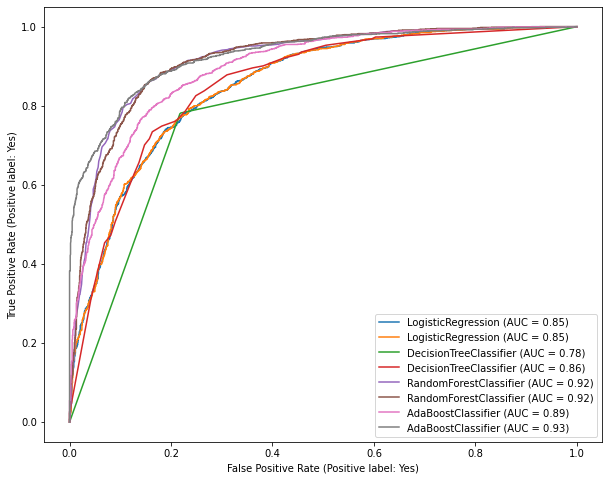

In [119]:
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1)
plot_roc_curve(lr, X_test, y_test, ax=ax)
plot_roc_curve(lrcv, X_test, y_test, ax=ax)
plot_roc_curve(dt, X_test, y_test, ax=ax)
plot_roc_curve(dtcv, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)
plot_roc_curve(rfcv, X_test, y_test, ax=ax)
plot_roc_curve(ad, X_test, y_test, ax=ax)
plot_roc_curve(adcv, X_test, y_test, ax=ax)

<strong>AdaBoostClassifier is a better performing model than all other as it has highest AUC</strong>

<h2>Model Saving</h2>

In [120]:
import pickle

pickle.dump(adcv, open('model.pickle', 'wb'))